# Lab Evaluation 3 - FoDS
- Roll No. : CB.EN.U4CSE20208
- Name : Aravind S

In [1]:
import pandas as pd
import numpy as np 
import array
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

- no. of mother-baby pairs : 1174
- Alpha : 5%
- Objective : Whether there is any difference in the ages of the smoking and non-smoking mothers.

In [2]:
df = pd.read_csv('test.csv')
df

,Unnamed: 0,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,0,120,284,27,62,100,False
1,1,113,282,33,64,135,False
2,2,128,279,28,64,115,True
3,3,108,282,23,67,125,True
4,4,136,286,25,62,93,False
...,...,...,...,...,...,...,...
1169,1169,113,275,27,60,100,False
1170,1170,128,265,24,67,120,False
1171,1171,130,291,30,65,150,True
1172,1172,125,281,21,65,110,False


In [3]:
df.columns

Index(['Unnamed: 0', 'Birth Weight', 'Gestational Days', 'Maternal Age',
       'Maternal Height', 'Maternal Pregnancy Weight', 'Maternal Smoker'],
      dtype='object')

## Question-1

In [5]:
df_age_smoking = df[['Maternal Age', 'Maternal Smoker']]
df_age_smoking

,Maternal Age,Maternal Smoker
0,27,False
1,33,False
2,28,True
3,23,True
4,25,False
...,...,...
1169,27,False
1170,24,False
1171,30,True
1172,21,False


In [6]:
smoker_age = df_age_smoking['Maternal Age'] [df_age_smoking['Maternal Smoker'] == True]
smoker_age

2       28
3       23
8       30
10      32
11      23
        ..
1162    28
1163    29
1164    21
1165    30
1171    30
Name: Maternal Age, Length: 459, dtype: int64

In [7]:
non_smoker_age = df_age_smoking['Maternal Age'] [df_age_smoking['Maternal Smoker'] == False]
non_smoker_age

0       27
1       33
4       25
5       33
6       23
        ..
1168    27
1169    27
1170    24
1172    21
1173    38
Name: Maternal Age, Length: 715, dtype: int64

array([<AxesSubplot:title={'center':'False'}>,
       <AxesSubplot:title={'center':'True'}>], dtype=object)

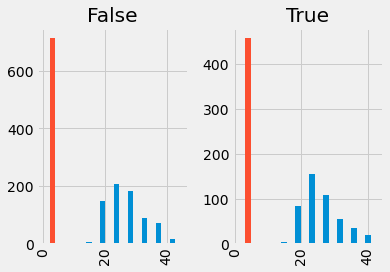

In [8]:
df_age_smoking.hist(by ='Maternal Smoker')

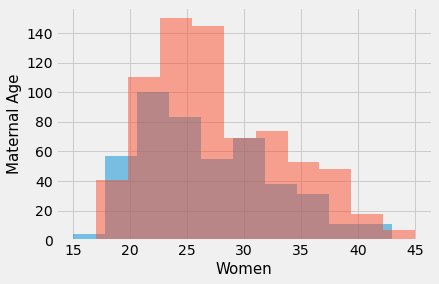

In [13]:
import seaborn as sns
smoker_age.hist(histtype='stepfilled', alpha=.5)
non_smoker_age.hist(histtype='stepfilled', alpha=.5)
plt.xlabel('Women',fontsize=15)
plt.ylabel('Maternal Age',fontsize=15)
# plt.legend(smoker_age='Smoker', non_smoker_age='Non Smoker') # add a legend for the plot
plt.show()

##### Inference
- Non Smokers have a higher Maternal Age as compared to Smokers

## Question-2

- we can use AB testing, along with causality
- here we can take multiple simulations to check whether it was of chance or not
- Average age of smokers are less than average age of non smokers
- i.e mean(smokers)< mean(smokers)

## Question-3

- Null Hypothesis : average mean of age of smokers is not less than average mean of age of non smokers i.e (>=)
- Alternate Hypothesis : average mean of age of smokers is less than average mean of age of non smokers, i.e (<)

## Question-4

- we can use ab testing along with causality for doing this test
- we can check with multiple simulations

## Question-5

In [14]:
mean_age_smoking = df_age_smoking.groupby('Maternal Smoker').mean()
mean_age_smoking

,Maternal Age
Maternal Smoker,
False,27.544056
True,26.736383


In [17]:
observed_difference = mean_age_smoking['Maternal Age'][1] - mean_age_smoking['Maternal Age'][0]
observed_difference

-0.8076725017901509

In [61]:
print('Observed Statistic : ', observed_difference)

Observed Statistic :  -0.8076725017901509


## Question-6

#### One Simulation

In [18]:
df_age_smoking

,Maternal Age,Maternal Smoker
0,27,False
1,33,False
2,28,True
3,23,True
4,25,False
...,...,...
1169,27,False
1170,24,False
1171,30,True
1172,21,False


In [20]:
shuffled_age_sample = df_age_smoking.sample(1174,replace = False)
shuffled_age_sample

,Maternal Age,Maternal Smoker
881,29,True
567,24,False
1035,26,False
213,42,True
1084,26,False
...,...,...
58,22,False
606,40,False
889,43,False
238,28,False


In [21]:
shuffled_age = shuffled_age_sample['Maternal Age']
shuffled_age

881     29
567     24
1035    26
213     42
1084    26
        ..
58      22
606     40
889     43
238     28
745     26
Name: Maternal Age, Length: 1174, dtype: int64

In [22]:
original_and_shuffled_age= df_age_smoking.assign(shuffled_age=shuffled_age.values )
original_and_shuffled_age

,Maternal Age,Maternal Smoker,shuffled_age
0,27,False,29
1,33,False,24
2,28,True,26
3,23,True,42
4,25,False,26
...,...,...,...
1169,27,False,22
1170,24,False,40
1171,30,True,43
1172,21,False,28


In [23]:
means_all_group= original_and_shuffled_age.groupby('Maternal Smoker').mean()
means_all_group

,Maternal Age,shuffled_age
Maternal Smoker,,
False,27.544056,27.257343
True,26.736383,27.183007


### Multiple Simulations

In [25]:
no_of_simulations = 5000

In [24]:
dist = np.zeros(no_of_simulations)
dist

array([0., 0., 0., ..., 0., 0., 0.])

In [29]:
sz = df_age_smoking.size
sz

2348

In [43]:
for i in np.arange(no_of_simulations):
    shuffled_age_sample = df_age_smoking.sample(1174,replace = False)
    shuffled_age = shuffled_age_sample['Maternal Age']
    original_and_shuffled_age= df_age_smoking.assign(shuffled_age=shuffled_age.values )
    means_all_group= original_and_shuffled_age.groupby('Maternal Smoker').mean()
    
    dist1 = means_all_group['shuffled_age'][0] - means_all_group['shuffled_age'][1]
    dist[i] = dist1 

dist

array([ 0.47498819, -0.39786096, -0.3084297 , ...,  0.07075887,
        0.12799488,  0.04214087])

### Question-7 (Histogram)

In [44]:
dist_df = pd.DataFrame(dist, columns = ['differences'])
dist_df

,differences
0,0.474988
1,-0.397861
2,-0.308430
3,-0.040136
4,-0.172494
...,...
4995,0.317589
4996,-0.054445
4997,0.070759
4998,0.127995


Observed Difference: -0.8076725017901509


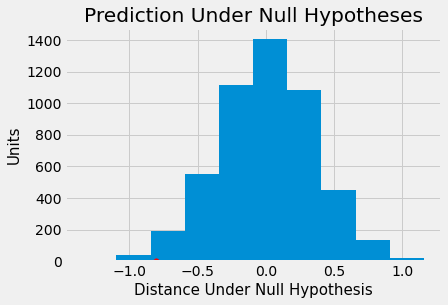

In [45]:
dist_df.hist(bins = 10)
plt.title('Prediction Under Null Hypotheses');
plt.xlabel('Distance Under Null Hypothesis',fontsize=15)
plt.ylabel('Units',fontsize=15);

plt.scatter(observed_difference, 0, color='red', s=30)

print('Observed Difference:', observed_difference)

#### Inference
- From this we can observe that, the observed value of -0.80 is on the least significat tail of the histogram
- also the differences are normally distributed

## Question-8 (Emperical p-value)

In [46]:
dist

array([ 0.47498819, -0.39786096, -0.3084297 , ...,  0.07075887,
        0.12799488,  0.04214087])

In [47]:
observed_difference

-0.8076725017901509

In [56]:
arrCond = dist <= observed_difference
arrCond

array([False, False, False, ..., False, False, False])

In [57]:
arrCond_df = pd.DataFrame(arrCond, columns = ['differences'])
arrCond_df

,differences
0,False
1,False
2,False
3,False
4,False
...,...
4995,False
4996,False
4997,False
4998,False


In [58]:
arrCond_table = arrCond_df.groupby('differences').size()
arrCond_table

differences
False    4933
True       67
dtype: int64

In [59]:
empirical_P = np.count_nonzero(arrCond)/dist_df.size
empirical_P

0.0134

## Question-9

In [60]:
print('Observed Distance', observed_difference)
print('Empirical P-value:', round(empirical_P, 2) *100, '%')

Observed Distance -0.8076725017901509
Empirical P-value: 1.0 %


- p value is less than 5%, that is the given alpha value, therefore the test satisfies the alternate hypothesis.
- Since the observed p value which is -0.80 and the observed difference in the histogram under null hypothesis is in the tail.
- the test favour alternative hypothesis more than null
- i.e the average age of smokers is less than average age of non-smoker

In [62]:
#end